# TME 3  : Résolution numérique d’équations différentielles ordinaires - 2ème partie : application au pendule chaotique

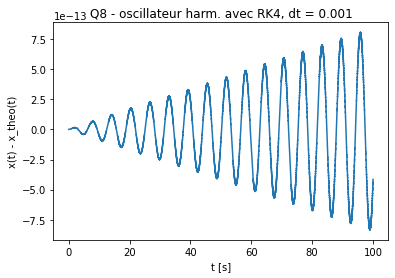

In [25]:
# -*- coding: utf-8 -*-
# Question: Q8 - rk4 et l'oscillateur harmonique
# Nom: Dirk Stratmann

import numpy as np
import matplotlib.pyplot as plt

 # charge la fonction rk4() du fichier local rk4.py

########## CALCUL:

def deriv(t, y, params):
    """
    Calcule les 1er dérivées de toutes les variables stockées dans y
    
    Parameters
    ----------
    t : un réel 
        le temps t actuel
    y : un tableau 1D numpy de dimension n, 
    avec n le nombre d'équations différentielles du premier ordre
        Contient les valeurs des n variables au temps t
    params : un scalaire ou un tableau
        Contient un ou des paramètres nécessaires pour le calcul

    Returns
    -------
    dy : même type que y
        Contient les 1er dérivées
    """
    
    omega = params
    dy = np.zeros(2)
    dy[0] = y[1]
    dy[1] = -omega**2*y[0]
    return dy


   
# paramètres
omega = 1
t = 0
dt = 0.001 
tmax = 100 #libre de choix
tValues = np.arange(0, tmax, dt)
n = tValues.size
xValues = np.empty(n)

x0 = 1 
v0 = 0 
y = np.empty(2)
y[0] = x0
y[1] = v0

xAnalytique = x0*np.cos(omega*tValues)

for i in range(n):
    xValues[i] = y[0]
    t = tValues[i]
    y = rk4(t, dt, y, deriv, omega)
    

############## AFFICHAGE:
    
plt.title("Q8 - oscillateur harm. avec RK4, dt = %1.3f" % dt)
plt.plot(tValues, xValues - xAnalytique)
plt.xlabel("t [s]")
plt.ylabel("x(t) - x_theo(t)")

# l'option bbox_inches est nécessaire pour ne pas couper la légende sur l'axe y
# l'option enlève aussi les bords blanc 
plt.savefig("Q8_dt%1.3f.pdf" % dt, bbox_inches='tight')  
plt.show()
    
    

### 3.1 Étude du mouvement d’un pendule avec l’approximation des petits angles

In [26]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [32]:
# -*- coding: utf-8 -*-

#QUESTION 1

def rk4(x, dx, y, deriv,params):
    """
      /*-----------------------------------------
      sous programme de resolution d'equations
      differentielles du premier ordre par
      la methode de Runge-Kutta d'ordre 4
      x = abscisse, une valeur scalaire, par exemple le temps
      dx = pas, par exemple le pas de temps
      y = valeurs des fonctions au temps t(i), c'est un tableau numpy de taille n
      avec n le nombre d'équations différentielles du 1er ordre
      
      rk4 renvoie les nouvelles valeurs de y pour t(i+1)
      
      deriv = variable contenant le nom du
      sous-programme qui calcule les derivees
      deriv doit avoir trois arguments: deriv(x,y,params) et renvoyer 
      un tableau numpy dy de taille n 
      ----------------------------------------*/
    """
    #  /* d1, d2, d3, d4 = estimations des derivees
    #    yp = estimations intermediaires des fonctions */  
    ddx = dx/2.       #         /* demi-pas */
    d1 = deriv(x,y,params)   #       /* 1ere estimation */          
    yp = y + d1*ddx
    #    for  i in range(n):
    #        yp[i] = y[i] + d1[i]*ddx
    d2 = deriv(x+ddx,yp,params)     #/* 2eme estimat. (1/2 pas) */
    yp = y + d2*ddx    
    d3 = deriv(x+ddx,yp,params)  #/* 3eme estimat. (1/2 pas) */
    yp = y + d3*dx    
    d4 = deriv(x+dx,yp,params)     #  /* 4eme estimat. (1 pas) */
    #/* estimation de y pour le pas suivant en utilisant
    #  une moyenne ponderee des derivees en remarquant
    #  que : 1/6 + 1/3 + 1/3 + 1/6 = 1 */
    return y + dx*( d1 + 2*d2 + 2*d3 + d4 )/6  



def deriv(t, y, params):
    """
    Calcule les 1er dérivées de toutes les variables stockées dans y
    
    Parameters
    ----------
    t : un réel 
        le temps t actuel
    y : un tableau 1D numpy de dimension n, 
    avec n le nombre d'équations différentielles du premier ordre
        Contient les valeurs des n variables au temps t
    params : un scalaire ou un tableau
        Contient un ou des paramètres nécessaires pour le calcul

    Returns
    -------
    dy : même type que y
        Contient les 1er dérivées
    """
    
    omega = params[0]
    q = params[1]
    
    dy = np.zeros(2)
    dy[0] = y[1]
    dy[1] = -omega**2*y[0] - q*y[1]
    return dy


def integrateODE(t, tmax, dt, saveInterval, init, deriv, params):
    
    tValues = np.arange(0, tmax, dt*saveInterval)
    nPoints = tValues.size
    xValues = np.empty(nPoints)
    
    n = len(init)
    y = np.empty(n)
    y[:] = init # copy elements
    
    
    for i in range(nPoints):
        xValues[i] = y[0]
        t = tValues[i]
        for j in range(saveInterval):
            y = rk4(t, dt, y, deriv, params)
            t += dt            
        
    return tValues, xValues


In [33]:
#paramètres 
omega = 1
t = 0
dt = 0.05
tmax = 20
saveInterval = 1
init = [math.radians(10),0]


In [41]:
#calcul pour divers valeurs :
tvq0,xvq0 = integrateODE(t,tmax,dt,saveInterval,init,deriv,[omega,0.5])
tvq1,xvq1 = integrateODE(t,tmax,dt,saveInterval,init,deriv,[omega,1])
tvq2,xvq2 = integrateODE(t,tmax,dt,saveInterval,init,deriv,[omega,2])
tvq5,xvq5 = integrateODE(t,tmax,dt,saveInterval,init,deriv,[omega,5])

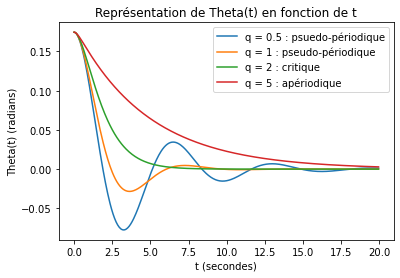

In [43]:
#Affichage
plt.plot(tvq0,xvq0,label = "q = 0.5 : psuedo-périodique")
plt.plot(tvq1,xvq1,label = "q = 1 : pseudo-périodique")
plt.plot(tvq2,xvq2,label = "q = 2 : critique")
plt.plot(tvq5,xvq5,label = "q = 5 : apériodique")

plt.title("Représentation de Theta(t) en fonction de t")
plt.xlabel("t (secondes)")
plt.ylabel("Theta(t) (radians)")
plt.legend()
plt.savefig("Q1.png")
plt.show()

In [44]:
#QUESTION 2

#paramètres
fc = 1

def derivQ2(t, y, params):

    omega = params[0]
    q = params[1]
    fc = params[2]
    
    dy = np.zeros(2)
    dy[0] = y[1]
    dy[1] = fc*math.sin((2*omega/3)*t) -omega**2*y[0] - q*y[1]
    return dy

def integrateODEQ2(t, tmax, dt, saveInterval, init, deriv, params):
    
    tValues = np.arange(0, tmax, dt*saveInterval)
    nPoints = tValues.size
    xValues = np.empty(nPoints)
    vValues = np.empty(nPoints)

    
    n = len(init)
    y = np.empty(n)
    y[:] = init # copy elements
    
    
    for i in range(nPoints):
        xValues[i] = y[0]
        vValues[i] = y[1]

        t = tValues[i]
        for j in range(saveInterval):
            y = rk4(t, dt, y, deriv, params)
            t += dt            
        
    return tValues, xValues,vValues


In [45]:
#calcul pour divers valeurs :
tvq0f0,xvq0f0,v00 = integrateODEQ2(t,tmax,dt,saveInterval,init,derivQ2,[omega,0,0])
tvq1f0,xvq1f0,v10 = integrateODEQ2(t,tmax,dt,saveInterval,init,derivQ2,[omega,1,0])
tvq1f1,xvq1f1,v11 = integrateODEQ2(t,tmax,dt,saveInterval,init,derivQ2,[omega,1,1])


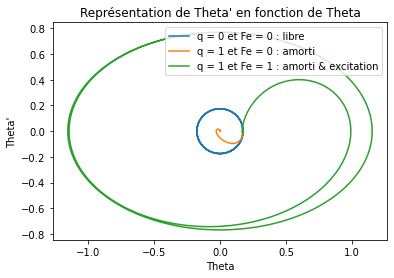

In [49]:
#Affichage
plt.plot(xvq0f0,v00,label = "q = 0 et Fe = 0 : libre")
plt.plot(xvq1f0,v10,label = "q = 1 et Fe = 0 : amorti")
plt.plot(xvq1f1,v11,label = "q = 1 et Fe = 1 : amorti & excitation")

plt.title("Représentation de Theta' en fonction de Theta")
plt.xlabel("Theta")
plt.ylabel("Theta'")
plt.legend()
plt.savefig("Q2.png")
plt.show()

In [107]:
math.degrees(1.1)

63.02535746439056

## 3.2 Mouvement chaotique

In [157]:
#Question 3

omega = 1
t = 0
dt = 0.05
tmax = 100
saveInterval = 1
init = [math.radians(10),0]
q = 0.5

def derivQ3(t, y, params):

    omega = params[0]
    q = params[1]
    fc = params[2]
    
    dy = np.zeros(2)
    dy[0] = y[1]
    dy[1] = fc*math.sin((2*omega/3)*t) -(omega**2)*math.sin(y[0]) - q*y[1]
    return dy

def integrateODEQ3(t, tmax, dt, saveInterval, init, deriv, params):
    
    tValues = np.arange(0, tmax, dt*saveInterval)
    nPoints = tValues.size
    xValues = np.empty(nPoints)
    
    n = len(init)
    y = np.empty(n)
    y[:] = init # copy elements
    
    
    for i in range(nPoints):
        xValues[i] = y[0]
        t = tValues[i]
        for j in range(saveInterval):
            y = rk4(t, dt, y, deriv, params)
            if y[0]>math.pi:
                y[0]-= 2*math.pi
            if y[0]<-math.pi:
                y[0]+= 2*math.pi
            t += dt            
        
    return tValues, xValues

In [158]:
#CALCUL 

tvF1,xvF1 = integrateODEQ3(t,tmax,dt,saveInterval,init,derivQ3,[omega,q,1.4])
tvF2,xvF2 = integrateODEQ3(t,tmax,dt,saveInterval,init,derivQ3,[omega,q,1.44])
tvF3,xvF3 = integrateODEQ3(t,tmax,dt,saveInterval,init,derivQ3,[omega,q,1.465])
tvF4,xvF4 = integrateODEQ3(t,tmax,dt,saveInterval,init,derivQ3,[omega,q,1.5])

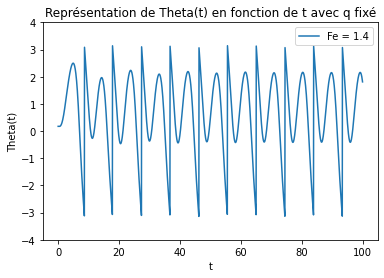

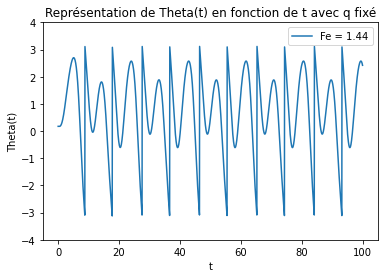

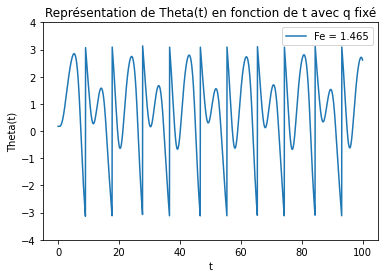

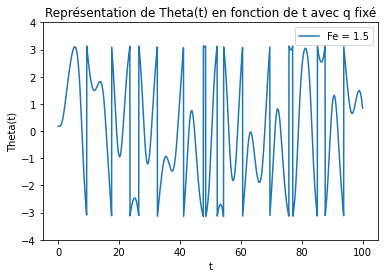

In [159]:
plt.plot(tvF1,xvF1,label = "Fe = 1.4")
plt.title("Représentation de Theta(t) en fonction de t avec q fixé")
plt.xlabel("t")
plt.ylabel("Theta(t)")
plt.legend()
plt.ylim(-4,4)
plt.savefig("Q3a.png")
plt.show()

plt.plot(tvF2,xvF2,label = "Fe = 1.44")
plt.title("Représentation de Theta(t) en fonction de t avec q fixé")
plt.xlabel("t")
plt.ylabel("Theta(t)")
plt.legend()
plt.ylim(-4,4)
plt.savefig("Q3b.png")
plt.show()

plt.plot(tvF3,xvF3,label = "Fe = 1.465")
plt.title("Représentation de Theta(t) en fonction de t avec q fixé")
plt.xlabel("t")
plt.ylabel("Theta(t)")
plt.legend()
plt.ylim(-4,4)
plt.savefig("Q3c.png")
plt.show()

plt.plot(tvF4,xvF4,label = "Fe = 1.5")
plt.title("Représentation de Theta(t) en fonction de t avec q fixé")
plt.xlabel("t")
plt.ylabel("Theta(t)")
plt.legend()
plt.ylim(-4,4)
plt.savefig("Q3d.png")
plt.show()

In [160]:
#Question 4

fc = 1.5

#calcul
tv10,xv10 = integrateODEQ3(t,tmax,dt,saveInterval,[math.radians(10),0],derivQ3,[omega,q,fc])
tv9,xv9 = integrateODEQ3(t,tmax,dt,saveInterval,[math.radians(9.999),0],derivQ3,[omega,q,fc])


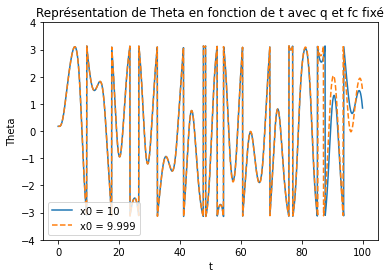

In [165]:
plt.plot(tv10,xv10,label = "x0 = 10")
plt.plot(tv9,xv9,'--',label = "x0 = 9.999")


plt.title("Représentation de Theta en fonction de t avec q et fc fixé")
plt.xlabel("t")
plt.ylabel("Theta")
plt.legend()
plt.ylim(-4,4)
plt.savefig("Q4a.png")
plt.show()

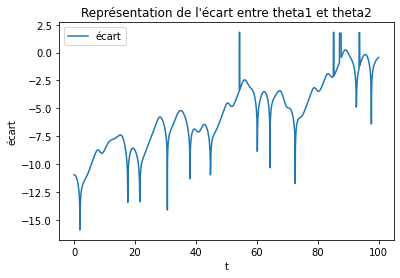

In [164]:
xv11 = np.zeros(tv9.shape)
for i in range(len(tv9)):
    xv11[i]= min(abs(xv10[i]-xv9[i]),abs(xv9[i]-xv10[i]))
plt.plot(tv9, np.log(abs(xv10-xv9)),label = 'écart')


plt.title("Représentation de l'écart entre theta1 et theta2")
plt.xlabel("t")
plt.ylabel("écart")
plt.legend()
plt.savefig("Q4b.png")
plt.show()

### 3.3 Diagramme de bifurcation.

In [226]:
fc = np.arange(2.55,2.90,0.001)
omega = 1
t = 0
dt = (3*math.pi)/200

tmax = 20000*dt
saveInterval = 1
init = [math.radians(10),0]
q = 0.5
   
        

In [227]:
def integrateODEQ5(t, tmax, dt, init, deriv, params):
    
    tValues = np.arange(0, tmax, dt)
    nPoints = tValues.size
    xValues = np.empty(nPoints)
    
    n = len(init)
    y = np.empty(n)
    y[:] = init # copy elements
    
    ret = []
    
    for i in range(nPoints):
        xValues[i] = y[0]
        t = tValues[i]
        y = rk4(t, dt, y, deriv, params)
        if y[0]>math.pi:
            y[0]-= 2*math.pi
        if y[0]<-math.pi:
            y[0]+= 2*math.pi
        t += dt            
        if (i>=10000 and i%200==0): 
            ret.append(y[0])
    return ret

[1.4776428551302352, 1.4776467182650628, 1.4776436535337512, 1.4776460848672581, 1.4776441560237823, 1.4776456862273677, 1.477644472275089, 1.4776454353362363, 1.4776446713135982, 1.4776452774334206, 1.4776447965820838, 1.477645178054487, 1.47764487542206, 1.4776451155085617, 1.477644925041431, 1.4776450761441804, 1.4776449562702454, 1.4776450513695123, 1.4776449759246866, 1.4776450357770905, 1.477644988294583, 1.4776450259637468, 1.4776449960797529, 1.4776450197875626, 1.4776450009795195, 1.4776450159004357, 1.4776450040632847, 1.4776450134540218, 1.4776450060040895, 1.47764501191433, 1.4776450072255893, 1.4776450109452859, 1.477645007994378, 1.4776450103354954, 1.477645008478221, 1.4776450099516354, 1.477645008782755, 1.4776450097100633, 1.4776450089743853, 1.477645009558043, 1.4776450090950144, 1.4776450094623261, 1.4776450091709512, 1.4776450094021116, 1.4776450092187077, 1.4776450093642275, 1.4776450092487887, 1.4776450093403637, 1.4776450092677258, 1.4776450093253561]


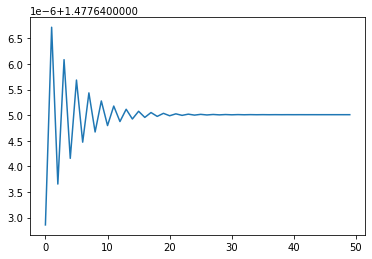

In [228]:
ret = integrateODEQ5(t,tmax,dt,[math.radians(10),0],derivQ3,[omega,q,1.41])
print(ret)
plt.plot(ret)



In [229]:
xval =[]
for i in range(len(fc)):
    lmin = integrateODEQ5(t,tmax,dt,[math.radians(10),0],derivQ3,[omega,q,fc[i]])
    xval.append(lmin)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


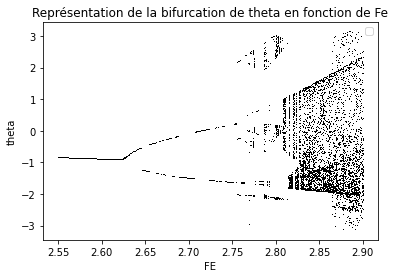

In [239]:
plt.plot(fc,xval,'k,')

plt.title("Représentation de la bifurcation de theta en fonction de Fe")
plt.xlabel("FE")
plt.ylabel("theta")
plt.legend()
plt.savefig("Q5.png",dpi=50)
plt.show()

In [243]:
fc2 = np.arange(1.41,1.5,0.001)


xval2 =[]
for i in range(len(fc2)):
    lmin2 = integrateODEQ5(t,tmax,dt,[math.radians(10),0],derivQ3,[omega,q,fc2[i]])
    xval2.append(lmin2)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


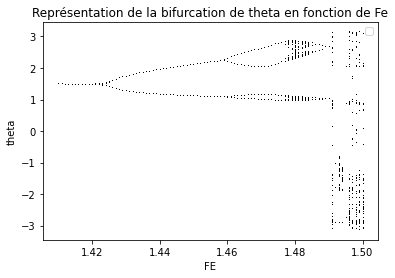

In [248]:
plt.plot(fc2,xval2,'k,',linewidth=0.01)

plt.title("Représentation de la bifurcation de theta en fonction de Fe")
plt.xlabel("FE")
plt.ylabel("theta")
plt.legend()
plt.savefig("Q6.png",dpi=200)
plt.show()